# Compute performance metrics for the given Y and Y_score without sklearn

In [2]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

# 1.  Compute Confusion Matrix 

In [44]:
data = pd.read_csv('5_a.csv')
print(data.y.value_counts())
data.head()

1.0    10000
0.0      100
Name: y, dtype: int64


,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [45]:
def predictor(x):
    if x < 0.5:
        return 0
    else:
        return 1
    
#Convering the 'proba' column into into a class label with only '0' and '1' as values    
data.proba = data.proba.map(predictor) 

#Giving a new name 'y_pred' to 'proba' 
data.columns = ['y', 'y_pred']

print(data.y_pred.value_counts())
data.head()

1    10100
Name: y_pred, dtype: int64


,y,y_pred
0,1.0,1
1,1.0,1
2,1.0,1
3,1.0,1
4,1.0,1


In [46]:
def Confusion_Matrix(data_frame, label1, label2):
    counter = 0
    for i in range(0, len(data_frame)):
        if data_frame.y[i] == label1 and data_frame.y_pred[i] == label2:
            counter += 1
    return counter   

In [47]:
#Computing Confusion Matrix Parameter (TP,TN,FN,FP)
TP = Confusion_Matrix(data, 1, 1)
TN = Confusion_Matrix(data, 0, 0)
FN = Confusion_Matrix(data, 1, 0)
FP = Confusion_Matrix(data, 0, 1)

print("True Positive ",TP)
print("True Negative ",TN)
print("False Positive ",FP)
print("False Negative ",FN)


True Positive  10000
True Negative  0
False Positive  100
False Negative  0


In [48]:
#Creating Confusion-Matrix
Confusion_Matrix = [[TN,FN], [FP,TP]]
Confusion_Matrix

[[0, 0], [100, 10000]]

# 2. Compute F1 Score 

In [49]:
#Calculating Precision
Precision = TP/(TP+FP)

#Calculating Recall
Recall = TP/(TP+FN)

print("Precision ",Precision)
print("Recall ", Recall)

#Calculating F1-Score
F1_Score = 2*(Precision*Recall)/(Precision+Recall)

print("F1-Score ",F1_Score)

Precision  0.9900990099009901
Recall  1.0
F1-Score  0.9950248756218906


#  3. Compute AUC Score

In [14]:
data = pd.read_csv('5_a.csv')
data.head()

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [15]:
#computing different thresholds and merging the labels based on that threshhold to the data
Threshold = set()
Threshold = sorted(data.proba,reverse=True)

for i in Threshold:
    lst = []
    for val in data.proba:
        if val < i:
            lst.append(0)
        else:
            lst.append(1)        
    data['Threshold '+str(i)] = lst
    
#Printing first 5 values of the data            
data.head()            

,y,proba,Threshold 0.8999653487823838,Threshold 0.899828305041011,Threshold 0.89982484614942,Threshold 0.8998118120764471,Threshold 0.8997678816682531,Threshold 0.8997510420266246,Threshold 0.8994674890303449,Threshold 0.8994444889794935,...,Threshold 0.5003078086272976,Threshold 0.5003012990201631,Threshold 0.5002436770798491,Threshold 0.5001997894475683,Threshold 0.5001975312600645,Threshold 0.5000812600762915,Threshold 0.5000581510668138,Threshold 0.5000580078593906,Threshold 0.5000473407183691,Threshold 0.5000185949718864
0,1.0,0.637387,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,1.0,0.635165,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,1.0,0.766586,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,1.0,0.724564,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,1.0,0.889199,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [16]:
#Printing a column(on a given threshold) value counts
data['Threshold '+str(0.89982484614942)].value_counts()

0    10097
1        3
Name: Threshold 0.89982484614942, dtype: int64

In [22]:
def Confusion_Matrix(data_frame, label1,label2):
    lst = []
    for thresh in Threshold:
        counter = 0
        for i in range(0,len(data_frame)):
            if data_frame.y[i] == label1 and data_frame['Threshold '+str(thresh)][i] == label2:
                counter +=1
        lst.append(counter)
    return lst   

In [23]:
#Computing Confusion Matrix Parameter (TP,TN,FN,FP) for each threshold column
TP = Confusion_Matrix(data, 1, 1)
TN = Confusion_Matrix(data, 0, 0)
FN = Confusion_Matrix(data, 1, 0)
FP = Confusion_Matrix(data, 0, 1)


print("True Positive's ",TP[:10])
print("True Negative's ",TN[:10])
print("False Positive's ",FP[:10])
print("False Negative's ",FN[:10])


True Positive's  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
True Negative's  [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
False Positive's  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
False Negative's  [9999, 9998, 9997, 9996, 9995, 9994, 9993, 9992, 9991, 9990]


In [31]:
def TPR_FPR_Calculator(arg1,arg2):
    lst = []
    for i in range(0, len(arg1)):
        lst.append(arg1[i]/(arg1[i]+arg2[i]))
    return lst         

In [35]:
#Computing TPR & FPR values for each threshold column
TPR = TPR_FPR_Calculator(TP,FN)
FPR = TPR_FPR_Calculator(FP,TN)

print("True Positive Rate's :- ",TPR[:10])
print("False Positive Rate's :- ",FPR[:10])

True Positive Rate's :-  [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001]
False Positive Rate's :-  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


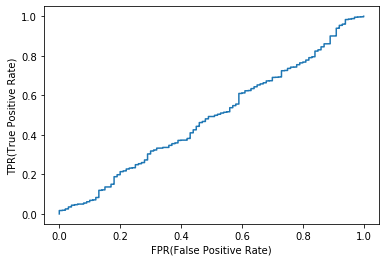

In [38]:
#plotting the TPR and FPR
import matplotlib.pyplot as plt
plt.plot(FPR,TPR)
plt.xlabel("FPR(False Positive Rate)")
plt.ylabel("TPR(True Positive Rate)")
plt.show()


In [43]:
#Computing AUC Score
print("The AUC score is :-",np.trapz(TPR, FPR))

The AUC score is :- 0.48829900000000004


# 4.Compute Accuracy Score 

In [50]:
#Calculating Accuracy
Accuracy = (TP+TN)/(TP+TN+FP+FN)
print("Accuracy Score :- ",Accuracy)

Accuracy Score :-  0.9900990099009901


# <pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

# 1.Compute Confusion Matrix

In [51]:
data = pd.read_csv('5_b.csv')
print(data.y.value_counts())
data.head()

0.0    10000
1.0      100
Name: y, dtype: int64


,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [52]:
def predictor(x):
    if x < 0.5:
        return 0
    else:
        return 1
    
#Convering the 'proba' column into into a class label with only '0' and '1' as values    
data.proba = data.proba.map(predictor) 

#Giving a new name 'y_pred' to 'proba' 
data.columns = ['y', 'y_pred']

print(data.y_pred.value_counts())
data.head()

0    9806
1     294
Name: y_pred, dtype: int64


,y,y_pred
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0


In [53]:
def Confusion_Matrix(data_frame, label1, label2):
    counter = 0
    for i in range(0, len(data_frame)):
        if data_frame.y[i] == label1 and data_frame.y_pred[i] == label2:
            counter += 1
    return counter   

In [57]:
#Computing Confusion Matrix Parameter (TP,TN,FN,FP) for each threshold column
TP = Confusion_Matrix(data, 1, 1)
TN = Confusion_Matrix(data, 0, 0)
FN = Confusion_Matrix(data, 1, 0)
FP = Confusion_Matrix(data, 0, 1)


print("True Positive ",TP)
print("True Negative ",TN)
print("False Positive ",FP)
print("False Negative ",FN)


True Positive  55
True Negative  9761
False Positive  239
False Negative  45


In [58]:
#Creating Confusion-Matrix
Confusion_Matrix = [[TN,FN], [FP,TP]]
Confusion_Matrix

[[9761, 45], [239, 55]]

# 2.Compute F1 Score

In [59]:
#Calculating Precision
Precision = TP/(TP+FP)

#Calculating Recall
Recall = TP/(TP+FN)

print("Precision ",Precision)
print("Recall ", Recall)

#Calculating F1-Score
F1_Score = 2*(Precision*Recall)/(Precision+Recall)

print("F1-Score ",F1_Score)

Precision  0.1870748299319728
Recall  0.55
F1-Score  0.2791878172588833


# 3.Computing AUC Score

In [61]:
data = pd.read_csv('5_b.csv')
data.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [62]:
#computing different thresholds and merging the labels based on that threshhold to the data
Threshold = set()
Threshold = sorted(data.proba,reverse=True)

for i in Threshold:
    lst = []
    for val in data.proba:
        if val < i:
            lst.append(0)
        else:
            lst.append(1)        
    data['Threshold '+str(i)] = lst
    
#Printing first 5 values of the data            
data.head()          

,y,proba,Threshold 0.5952941839776669,Threshold 0.5948084022757003,Threshold 0.5921978708413235,Threshold 0.5901714464524004,Threshold 0.5887181867417832,Threshold 0.5851746698101434,Threshold 0.5832352156485459,Threshold 0.5822100493664223,...,Threshold 0.10039740418217284,Threshold 0.1003371449874035,Threshold 0.10030373243093957,Threshold 0.10024743027210822,Threshold 0.1002421268327976,Threshold 0.10022970009062958,Threshold 0.10018885836254708,Threshold 0.10016507626754403,Threshold 0.10016080437256432,Threshold 0.10000141285578913
0,0.0,0.281035,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0.0,0.465152,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0.0,0.352793,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,0.0,0.157818,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0.0,0.276648,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [65]:
#Printing a column(on a given threshold) value counts
data['Threshold '+str(0.5887181867417832)].value_counts()

0    10095
1        5
Name: Threshold 0.5887181867417832, dtype: int64

In [66]:
def Confusion_Matrix(data_frame, label1,label2):
    lst = []
    for thresh in Threshold:
        counter = 0
        for i in range(0,len(data_frame)):
            if data_frame.y[i] == label1 and data_frame['Threshold '+str(thresh)][i] == label2:
                counter +=1
        lst.append(counter)
    return lst   

In [67]:
#Computing Confusion Matrix Parameter (TP,TN,FN,FP) for each threshold column
TP = Confusion_Matrix(data, 1, 1)
TN = Confusion_Matrix(data, 0, 0)
FN = Confusion_Matrix(data, 1, 0)
FP = Confusion_Matrix(data, 0, 1)


print("True Positive's ",TP[:10])
print("True Negative's ",TN[:10])
print("False Positive's ",FP[:10])
print("False Negative's ",FN[:10])

True Positive's  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
True Negative's  [10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]
False Positive's  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
False Negative's  [99, 98, 97, 96, 95, 94, 93, 92, 91, 90]


In [68]:
def TPR_FPR_Calculator(arg1,arg2):
    lst = []
    for i in range(0, len(arg1)):
        lst.append(arg1[i]/(arg1[i]+arg2[i]))
    return lst         

In [69]:
#Computing TPR & FPR values for each threshold column
TPR = TPR_FPR_Calculator(TP,FN)
FPR = TPR_FPR_Calculator(FP,TN)

print("True Positive Rate's :- ",TPR[:10])
print("False Positive Rate's :- ",FPR[:10])

True Positive Rate's :-  [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
False Positive Rate's :-  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


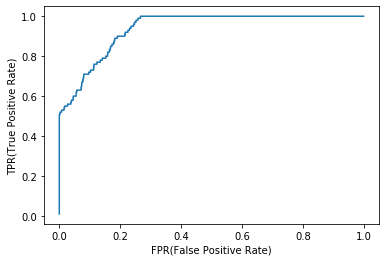

In [70]:
#plotting the TPR and FPR
import matplotlib.pyplot as plt
plt.plot(FPR,TPR)
plt.xlabel("FPR(False Positive Rate)")
plt.ylabel("TPR(True Positive Rate)")
plt.show()


In [71]:
#Computing AUC Score
print("The AUC score is :-",np.trapz(TPR, FPR))

The AUC score is :- 0.9377570000000001


# 4.Computing Accuracy


In [60]:
#Calculating Accuracy
Accuracy = (TP+TN)/(TP+TN+FP+FN)
print("Accuracy Score :- ",Accuracy)

Accuracy Score :-  0.9718811881188119


<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [3]:
data = pd.read_csv('5_c.csv')
print(data.y.value_counts())
data.head()

0    1805
1    1047
Name: y, dtype: int64


,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [5]:
#computing different thresholds and merging the labels based on that threshhold to the data
Threshold = set()
Threshold = sorted(data.prob,reverse=True)

for i in Threshold:
    lst = []
    for val in data.prob:
        if val < i:
            lst.append(0)
        else:
            lst.append(1)        
    data['Threshold '+str(i)] = lst
    
#Printing first 5 values of the data            
data.head()          

,y,prob,Threshold 0.9577467989277196,Threshold 0.9514369163158778,Threshold 0.9486377939984604,Threshold 0.9440936134070964,Threshold 0.9411131844327256,Threshold 0.9216107669714336,Threshold 0.918113140842399,Threshold 0.9163642710427174,...,Threshold 0.03415431203068908,Threshold 0.03280642064842021,Threshold 0.03191340452915914,Threshold 0.03188140327866018,Threshold 0.03139788556743317,Threshold 0.0311139870334316,Threshold 0.030268601469091494,Threshold 0.028963660871660364,Threshold 0.02839574137249512,Threshold 0.02803798623987141
0,0,0.458521,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0.505037,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0.418652,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,0,0.412057,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0.375579,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [6]:
#Printing a column(on a given threshold) value counts
data['Threshold '+str(0.9486377939984604)].value_counts()

0    2849
1       3
Name: Threshold 0.9486377939984604, dtype: int64

In [8]:
def Confusion_Matrix(data_frame, label1,label2):
    lst = []
    for thresh in Threshold:
        counter = 0
        for i in range(0,len(data_frame)):
            if data_frame.y[i] == label1 and data_frame['Threshold '+str(thresh)][i] == label2:
                counter +=1
        lst.append(counter)
    return lst   

In [9]:
#Computing Confusion Matrix Parameter (TP,TN,FN,FP) for each threshold column
FN = Confusion_Matrix(data, 1, 0)
FP = Confusion_Matrix(data, 0, 1)

print("False Positive's ",FP[:10])
print("False Negative's ",FN[:10])

False Positive's  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
False Negative's  [1046, 1045, 1044, 1043, 1042, 1041, 1040, 1039, 1038, 1037]


In [11]:
A={}
for i in range(0, len(FP)):
    a = 500*FN[i] + 100*FP[i]
    A[Threshold[i]] = a

In [41]:
key_min = min(A.keys(), key=(lambda k: A[k]))

print("Threshold at which A is minimum ",key_min)
print('Minimum Value of A : ',A[key_min])


Threshold at which A is minimum  0.2300390278970873
Minimum Value of A :  141000


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [3]:
data = pd.read_csv('5_d.csv')
data.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


# 1. Compute Mean Square Error

In [9]:
Mean_Square_Error = sum((data.y-data.pred)**2)/len(data)
print("Mean_Square_Error :- ",Mean_Square_Error)

Mean_Square_Error :-  177.16569974554707


# 2. Compute MAPE

In [28]:
MAPE = sum(abs(data.pred-data.y))/sum(data.y)
#OR WE CAN WRITE MAPE AS BELOW TWO LINES OF CODE BUT I HAVE COMMENTED IT
#APE = abs(data.pred-data.y)/(np.mean(data.y))
#MAPE = np.mean(APE)
print("Mean Absolute Percentage Error :- ",MAPE)

Mean Absolute Percentage Error :-  0.1291202994009687


# 3. Compute R^2 error

In [13]:
SS_total = sum((data.y-(np.mean(data.y)))**2)/len(data)
#R-Squared 
R_Squared = 1-(Mean_Square_Error/SS_total)
print("R-Squred is : ",R_Squared)

R-Squred is :  0.9563582786990964
